In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


## MNIST Hand Written Digit

### Loading the data

In [3]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels),(test_images,test_labels)=mnist.load_data()

11493376/11490434 [==============================] - 23s 2us/step


In [4]:
print(len(train_images))
print(len(train_labels))

60000
60000


In [5]:
print(len(test_images))
print(len(test_labels))

10000
10000


In [6]:
print(test_images.shape)
train_images.shape

(10000, 28, 28)


(60000, 28, 28)

In [19]:
train_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [9]:
train_images[0].ndim

2

In [10]:
train_images[0].shape

(28, 28)

In [11]:
train_images.shape

(60000, 28, 28)

In [12]:
train_labels[0]

5

### The Network Architecture

In [14]:
from tensorflow.keras import models
from tensorflow.keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

### The Compilation Step

In [15]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

### Preparing the Image Data

Class Label: 7


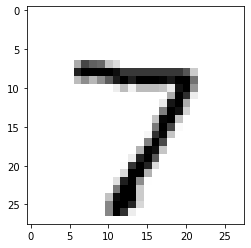

In [17]:
import matplotlib.pyplot as plt

digit = test_images[0]
print("Class Label:",test_labels[0])
#digit.shape

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [18]:
train_images = train_images.reshape((60000, 28 * 28))     # All images between 0 and 1, 3 dim to 2 dim
train_images = train_images.astype('float32') / 255 #Normalization


test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255 #Normalization

### Prepaing Labels, One Hot Encode

In [20]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Training

In [22]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2585 - accuracy: 0.9255
Epoch 2/5
469/469 [==============================] - 3s 5ms/step - loss: 0.1042 - accuracy: 0.9692
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0698 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0507 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0385 - accuracy: 0.9882


In [25]:
test_loss, test_acc=network.evaluate(test_images, test_labels)
print('test_acc: ', test_acc)

313/313 [==============================] - 0s 2ms/step - loss: 0.0753 - accuracy: 0.9776
test_acc:  0.9775999784469604


In [27]:
network.predict(test_images)[0]

array([4.7849682e-08, 3.6113133e-11, 6.1353676e-06, 1.9791981e-04,
       1.7355111e-12, 7.0444642e-08, 1.2765737e-14, 9.9976391e-01,
       1.2392258e-07, 3.1742791e-05], dtype=float32)

### Displaying the Fourth Digit

Class Label: 4


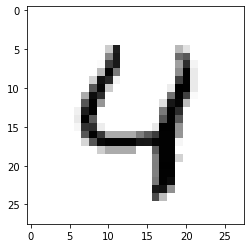

In [30]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels),(test_images,test_labels)=mnist.load_data()


digit = test_images[4]
print("Class Label:",test_labels[4])
#digit.shape

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()